In [1]:
import tensorflow as tf
from  tensorflow.keras.datasets import cifar10
from  tensorflow.keras.utils import to_categorical
from  tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from  tensorflow.keras.models import Model
from  tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
x_train[54, 12, 13, 1] 

0.36862746

In [5]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [7]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

In [9]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

c:\ProgramData\Anaconda3\envs\mibot\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 17s 6ms/step - loss: 1.5524 - accuracy: 0.4563 - val_loss: 1.3061 - val_accuracy: 0.5332
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1496 - accuracy: 0.5954 - val_loss: 1.2663 - val_accuracy: 0.5601
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0008 - accuracy: 0.6510 - val_loss: 0.9519 - val_accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9162 - accuracy: 0.6820 - val_loss: 1.0882 - val_accuracy: 0.6165
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8517 - accuracy: 0.7034 - val_loss: 0.9705 - val_accuracy: 0.6607
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7971 - accuracy: 0.7225 - val_loss: 1.2769 - val_accuracy: 0.5894
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7559 - accuracy: 0.7352 - val_loss: 0.8848 - val_accura

In [12]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 27ms/step - loss: 0.8187 - accuracy: 0.7176


[0.818738579750061, 0.7175999879837036]

In [13]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

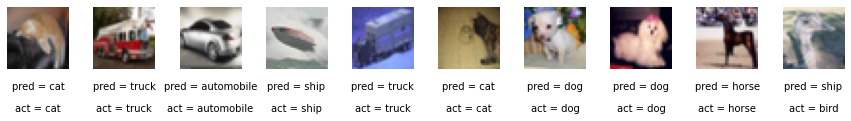

In [18]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)